# **RANDOM FOREST REGRESSOR MODEL**

IMPORTING LIBRARIES

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

PREPROCESSING IMAGES

In [2]:
# Function to extract features from images
def extract_features(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)  # Resize the image to a consistent size
    flattened_img = img.flatten()  # Flatten the image as a feature vector
    return flattened_img

READING THE INPUT

In [3]:
image_folder = 'cropped kit images'
labels_csv = 'kit-images labels.csv'

# Function to load images and labels from a folder and CSV file
def load_images_and_labels(image_folder, labels_csv):
    images, labels = [], []

    labels_df = pd.read_csv(labels_csv)

    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, filename)
            label_row = labels_df[labels_df['Image_File'] == filename]

            if not label_row.empty:
                label = float(label_row['Numeric_Label'].values[0])
                images.append(extract_features(image_path))
                labels.append(label)

    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(image_folder, labels_csv)

SPLITING DATA

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

TRAINING THE MODEL

In [5]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training model
random_forest_regressor.fit(X_train, y_train)

#predictions on the test set
predictions_RFR = random_forest_regressor.predict(X_test)

PERFORMANCE MEASURES

In [6]:
mse_RFR = mean_squared_error(y_test, predictions_RFR)
r2_RFR = r2_score(y_test, predictions_RFR)

print(f'R2 Score: {r2_RFR}')
print(f"Mean Squared Error: {mse_RFR}")

R2 Score: -0.19705906098247983
Mean Squared Error: 360.1059649230769


In [7]:
import joblib

# Save the RFR model
joblib.dump(random_forest_regressor, 'random_forest_regressor_model.pkl')


['random_forest_regressor_model.pkl']

VISUALIZING RESULTS

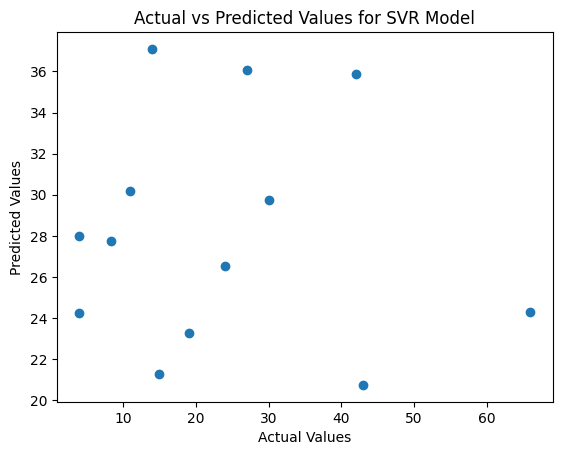

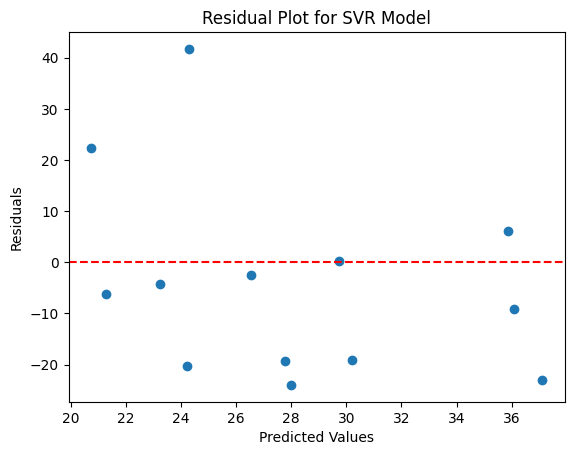

In [8]:
plt.scatter(y_test, predictions_RFR)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for SVR Model')
plt.show()

# Residual plot
residuals = y_test - predictions_RFR
plt.scatter(predictions_RFR, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR Model')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# **Convolutional Neural Network**

IMPORTING LIBRARIES

In [9]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

PREPROCESSING IMAGES

In [10]:
# Function to resize, normalize, and apply histogram equalization to images
def preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)  # Resize the image

    #image to grayscale
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #  histogram equalization
    img_equalized = cv2.equalizeHist(img)

    # Normalize pixel values to be between 0 and 1
    img_normalized = normalize(img_equalized)

    # channel dimension
    img_normalized = np.expand_dims(img_normalized, axis=-1)

    return img_normalized

READING THE INPUT

In [11]:
# Function to load images and labels from a folder and CSV file
def load_images_and_labels(image_folder, labels_csv, target_size):
    images, labels = [], []

    labels_df = pd.read_csv(labels_csv)

    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, filename)
            label_row = labels_df[labels_df['Image_File'] == filename]

            if not label_row.empty:
                label = float(label_row['Numeric_Label'].values[0])
                img = preprocess_image(image_path, target_size)
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

image_folder = 'cropped kit images'
labels_csv = 'kit-images labels.csv'
target_size = (256, 256)

images, labels = load_images_and_labels(image_folder, labels_csv, target_size)

SPLITING DATA

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

CNN MODEL DEFINED

In [13]:
# CNN model
def create_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense (fully connected) layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1))  # Output layer with 1 neuron for regression tasks

    return model

MODEL COMPILATION

In [14]:
input_shape = (256, 256, 1)

model = create_cnn_model(input_shape)

# Compiling model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

MODEL TRAINING

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


2024-03-09 20:42:31.374602: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 1s 330ms/step - loss: 1155.7699 - val_loss: 1878.4078
Epoch 2/10
2/2 [==============================] - 1s 250ms/step - loss: 1037.7650 - val_loss: 1195.3333
Epoch 3/10
2/2 [==============================] - 1s 247ms/step - loss: 553.7878 - val_loss: 713.2596
Epoch 4/10
2/2 [==============================] - 1s 243ms/step - loss: 467.0574 - val_loss: 763.9469
Epoch 5/10
2/2 [==============================] - 1s 301ms/step - loss: 357.6850 - val_loss: 795.0599
Epoch 6/10
2/2 [==============================] - 1s 263ms/step - loss: 360.3960 - val_loss: 758.2933
Epoch 7/10
2/2 [==============================] - 1s 243ms/step - loss: 362.0107 - val_loss: 740.6813
Epoch 8/10
2/2 [==============================] - 1s 239ms/step - loss: 360.5374 - val_loss: 789.7482
Epoch 9/10
2/2 [==============================] - 1s 234ms/step - loss: 359.9153 - val_loss: 845.3527
Epoch 10/10
2/2 [==============================] - 1s 242ms/step - loss: 369.8576 - val_l

EVALUATING MODEL

In [16]:
cnn_predictions = model.predict(X_test).flatten()

1/1 [==============================] - 0s 132ms/step


In [17]:
cnn_mse = mean_squared_error(y_test, cnn_predictions)
cnn_r2 = r2_score(y_test, cnn_predictions)

print(f"CNN Model Mean Squared Error: {cnn_mse}")
print(f"CNN Model R^2 Score: {cnn_r2}")

CNN Model Mean Squared Error: 308.9547255633099
CNN Model R^2 Score: -0.02702284797730936


VISUALIZING RESULTS

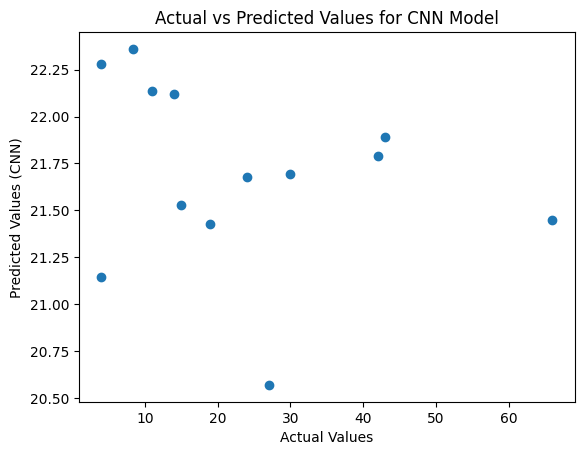

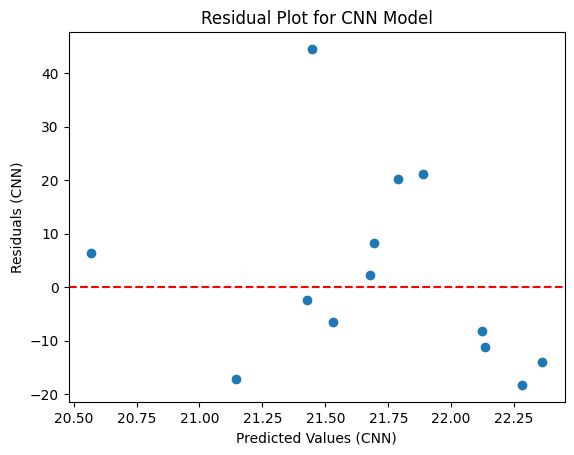

In [18]:
plt.scatter(y_test, cnn_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (CNN)')
plt.title('Actual vs Predicted Values for CNN Model')
plt.show()

# Residual plot
cnn_residuals = y_test - cnn_predictions
plt.scatter(cnn_predictions, cnn_residuals)
plt.xlabel('Predicted Values (CNN)')
plt.ylabel('Residuals (CNN)')
plt.title('Residual Plot for CNN Model')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [19]:
# Save the CNN model
model.save('cnn_model.h5')


# **SUPPORT VECTOR REFRESSOR MODEL**

IMPORTING LIBRARIES

In [20]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

IMAGE PREPORCESSING

In [21]:
# Function to resize, normalize, and apply histogram equalization to images
def preprocess_image(image_path, target_size):
    img = cv2.imread(image_path)
    img = cv2.resize(img, target_size)  # Resize the image

    #image to grayscale
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #histogram equalization
    img_equalized = cv2.equalizeHist(img)

    # Normalize pixel values to be between 0 and 1
    img_normalized = img_equalized / 255.0

    return img_normalized.flatten()  # Flatten the image as a feature vector

READING DATA

In [22]:
# Function to load images and labels from a folder and CSV file
def load_images_and_labels(image_folder, labels_csv, target_size):
    images, labels = [], []

    labels_df = pd.read_csv(labels_csv)

    for filename in os.listdir(image_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(image_folder, filename)
            label_row = labels_df[labels_df['Image_File'] == filename]

            if not label_row.empty:
                label = float(label_row['Numeric_Label'].values[0])
                img = preprocess_image(image_path, target_size)
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)

image_folder = 'cropped kit images'
labels_csv = 'kit-images labels.csv'
target_size = (256, 256)

images, labels = load_images_and_labels(image_folder, labels_csv, target_size)

SPLITIING DATA

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

MODEL PIPELINE

In [24]:
# Create SVR model with hyperparameters
svr_model = make_pipeline(StandardScaler(), SVR(C=100, epsilon=0.01, kernel='rbf'))

# Train the SVR model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svr_model.predict(X_test)

EVALUATING MODEL

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 384.68794363605497
R^2 Score: -0.27877412049707195


VISUALIZING RESULTS

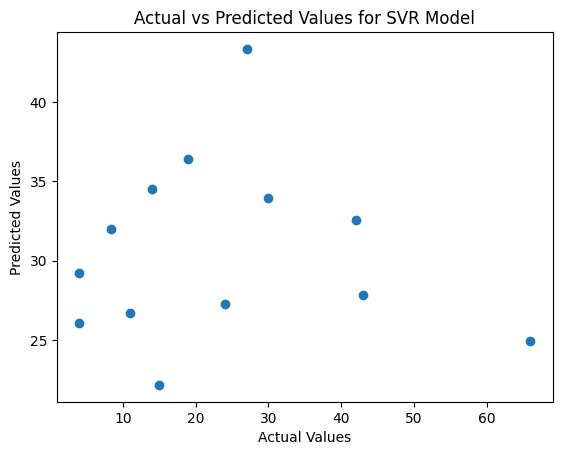

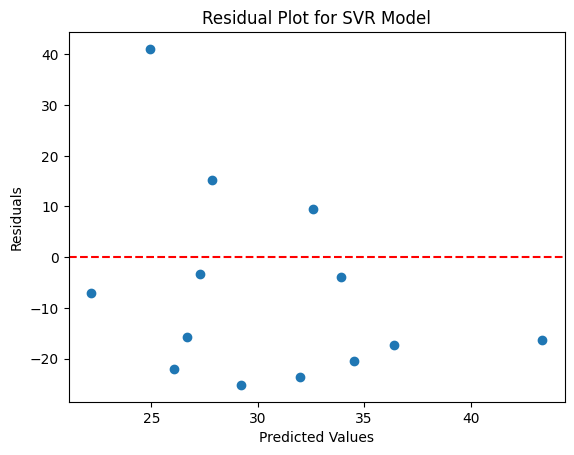

In [26]:
# Plotting results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for SVR Model')
plt.show()

# Residual plot
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for SVR Model')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [27]:
# Save the SVR model
joblib.dump(svr_model, 'svr_model.pkl')


['svr_model.pkl']